In [14]:
import os
import sys
sys.path.append('path/to/dir')

In [12]:
from Sample import Sample
import matplotlib.pyplot as plt
from segmentation.segmentation import Segmentation
from skimage.segmentation import find_boundaries
import cv2 
import os
import numpy as np
import preprocessing.preprocess as pp
import registration.register as reg
from utils import additive_blend

In [5]:
# Load the sample from the respective directory
sample_directory = "/Volumes/Custom/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria/_tmp_simon/20211214_18-2600_BM"
save_directory = "/Volumes/Custom/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria/0_ImagesAnalysis"

In [6]:
example = Sample(sample_directory)

save_directory = os.path.join(save_directory, example.sample_name)

if not os.path.isdir(save_directory):
    os.mkdir(save_directory)

Found the following ROIs: [17, 7, 16, 1]


/Users/simon.gutwein/src/workflow/Sample.py:96: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.if_imgs = np.array([cv2.cvtColor(cv2.imread(df[x]), cv2.COLOR_BGR2GRAY) for x in ["if_b", "if_g", "if_r"]])


FileNotFoundError: [Errno 2] No such file or directory: '/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria/0_ImagesAnalysis/20211214_18-2600_BM'

In [15]:
roi = example.rois[0]

pp_if = pp.preprocess(roi.if_nuc)
pp_imc = pp.preprocess(roi.imc_nuc_upscaled)

In [18]:
import importlib
importlib.reload(reg)
ex = reg.FeatureExtractor("sift")

In [19]:
ex(pp_if, pp_imc)

KeyboardInterrupt: 

In [ ]:
import importlib
importlib.reload(reg)
ex = reg.FeatureExtractor("orb")
ex(pp_if, pp_imc)

In [5]:
#fig, ax = plt.subplots(5, len(example.rois), figsize=(15, 10))
    pp_if = pp.preprocess(roi.if_nuc)
    pp_imc = pp.preprocess(roi.imc_nuc_upscaled)

    #ax[0, i].imshow(roi.if_nuc)
    #ax[1, i].imshow(pp_if)
    #ax[2, i].imshow(roi.imc_nuc)
    #ax[3, i].imshow(pp_imc)

    h = reg.find_matches(pp_if, pp_imc)
    transformed = reg.transform(pp_if, pp_imc, h)
    #ax[4, i].imshow(additive_blend(transformed, pp_imc))
    example.rois[i].if_registered = transformed
    print(f"Registered {roi.roi_num}")
    #plt.tight_layout()
#plt.show()


Found 590 matches.
Registered 2
Found 647 matches.
Registered 3
Found 528 matches.
Registered 4
Found 654 matches.
Registered 1


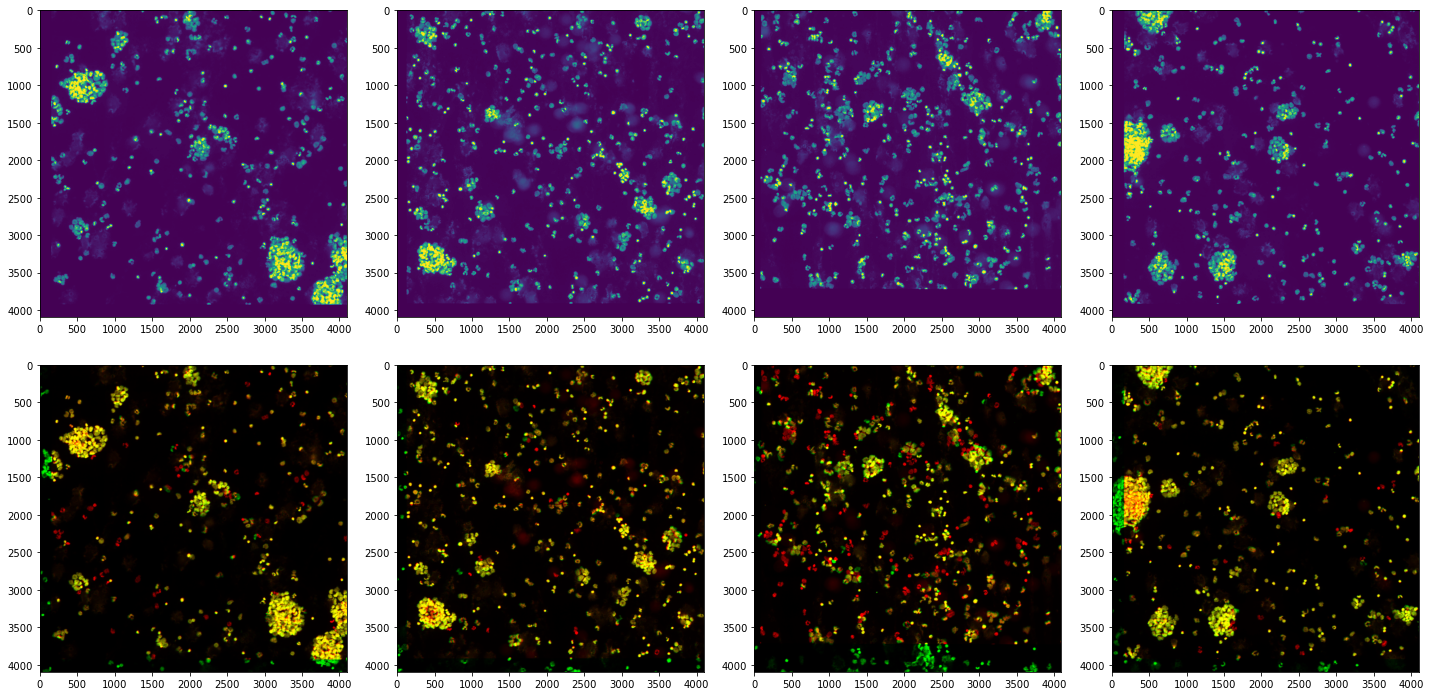

In [6]:
fig, ax = plt.subplots(2, len(example.rois), figsize=(20, 10))


for i, roi in enumerate(example.rois):
    try:
        ax[0,i].imshow(roi.if_registered)
        ax[1,i].imshow(additive_blend(roi.if_registered, roi.imc_nuc_upscaled))
    except:
        ax[0].imshow(roi.if_registered)
        ax[1].imshow(additive_blend(roi.if_registered, roi.imc_nuc_upscaled))

plt.tight_layout()
plt.show()


In [7]:
# Initialize the Segmentation Class with thre correct resolution
Mesmer = Segmentation("mesmer", mpp=0.175)

2022-03-15 16:46:34.618883: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/simon_g/anaconda3/envs/py39/lib/python3.9/site-packages/cv2/../../lib64:
2022-03-15 16:46:34.618913: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2022-03-15 16:46:37.457334: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-03-15 16:46:37.493070: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: Tesla V100-DGXS-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.72GiB deviceMemoryBandwidth: 836.37GiB/s
2022-03-15 16:46:37.494637: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:08:00.0 name: Tesla V100-DGXS-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.72GiB deviceMemoryBandwidth: 836.37GiB/s
2022-03-15 16:46:37.496153: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 2 with properties: 
pciBusID: 0000:0e:00.0 name: Tesla V100-DGXS-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.72GiB deviceMemoryBandwidth: 836.37GiB/s
2

Using Mesmer for segmentation!


In [8]:
for i, roi in enumerate(example.rois):
    
    example.rois[i].segmentation = Mesmer(roi.if_registered)

Predicting using Mesmer


2022-03-15 16:46:47.912823: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-15 16:46:47.931476: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2198740000 Hz


Predicting using Mesmer


Predicting using Mesmer


Predicting using Mesmer


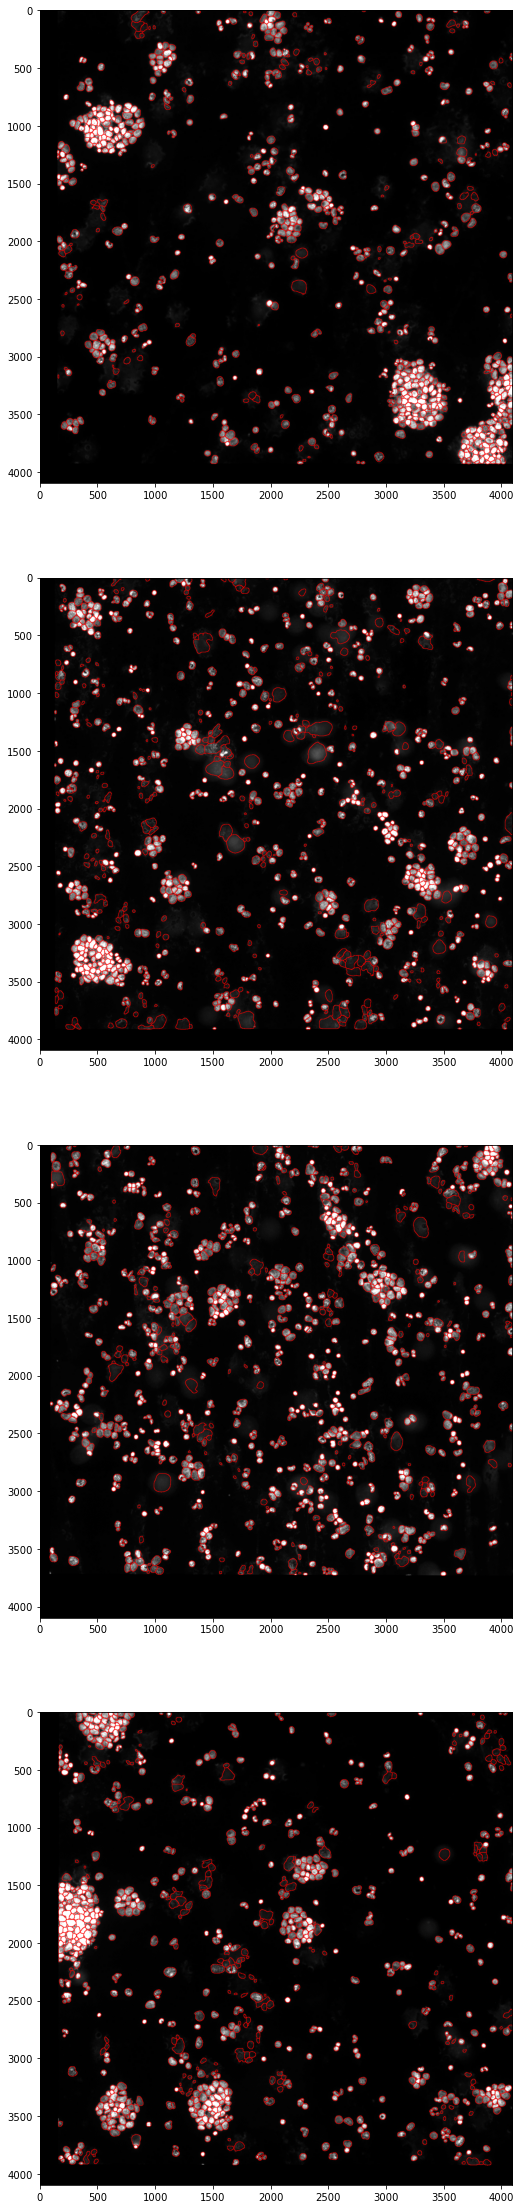

In [9]:
# lets look at the masks
fig, ax = plt.subplots(len(example.rois), figsize=(10, 40))

for i, roi in enumerate(example.rois):
    
    rgb_data = cv2.cvtColor(roi.if_registered, cv2.COLOR_GRAY2RGB)
    boundaries = np.zeros_like(roi.if_registered)
    overlay_data = np.copy(rgb_data)

    boundary = find_boundaries(roi.segmentation, connectivity=0, mode='outer')
    boundaries[boundary > 0] = 1
    boundaries = cv2.dilate(boundaries, np.ones((4,4)))

    overlay_data[boundaries > 0] = (255,0,0)

    try:
        ax[i].imshow(overlay_data)
    except:
        ax.imshow(overlay_data)

In [10]:
import pickle

with open(os.path.join(save_directory, f"{example.sample_name}.pkl"), "wb+") as fout:
    pickle.dump(example, fout)

In [11]:
import pickle
import cv2
import matplotlib.pyplot as plt
import numpy as np
with open(os.path.join(save_directory, f"{example.sample_name}.pkl"), "rb") as fin:
    sample = pickle.load(fin)

In [12]:
from feature_extraction.extract import extract
import pandas as pd

for roi in sample.rois:

    features = pd.DataFrame(extract(cv2.resize(roi.segmentation, roi.imc_nuc.shape, interpolation=cv2.INTER_NEAREST), roi.imc_imgs, roi.imc_marker))

    with open(os.path.join(save_directory, f"{example.sample_name}_f{roi.roi_num}.pkl"), "wb+") as fout:
        pickle.dump(features, fout)